# Splane tutorial: Identification of uniform spatial domain on human breast cancer Visium dataset 

July 2023

Dataset: 11 Visium slices of human breast cancer ([here](https://zenodo.org/record/8167488)).

In [1]:
from SPACEL.setting import set_environ_seed
set_environ_seed(42)
from SPACEL import Splane

import scanpy as sc
import matplotlib
import pandas as pd
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=100,dpi_save=300,facecolor='white',fontsize=10,vector_friendly=True,figsize=(3,3))

Setting environment seed: 42


## Spatial transcriptomic data import

The input data type of Splane is a list of anndata objects for each slice from Spoint. If users use cell type composition from other deconvoluiton methods, the anndata objects of each slice must contain cell type composition in `.obs` and cell types name in `.uns['celltypes']`

In [2]:
st_1142243F_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_1142243F.h5ad')
st_1160920F_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_1160920F.h5ad')
st_CID4290_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_CID4290.h5ad')
st_CID4465_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_CID4465.h5ad')
st_CID44971_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_CID44971.h5ad')
st_CID4535_ad = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_CID4535.h5ad')
Parent_Visium_Human_BreastCancer = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_Parent_Visium_Human_BreastCancer.h5ad')
V1_Breast_Cancer_Block_A_Section_1 = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_V1_Breast_Cancer_Block_A_Section_1.h5ad')
V1_Breast_Cancer_Block_A_Section_2 = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_V1_Breast_Cancer_Block_A_Section_2.h5ad')
V1_Human_Invasive_Ductal_Carcinoma = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_V1_Human_Invasive_Ductal_Carcinoma.h5ad')
Visium_FFPE_Human_Breast_Cancer = sc.read_h5ad('../data/visium_human_breast_cancer/human_bc_spatial_Visium_FFPE_Human_Breast_Cancer.h5ad')

Loading the cell type composition of spots of these slices predicted by **Spoint**.

In [3]:
st_1142243F_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_1142243F.csv',index_col=0)
st_1160920F_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_1160920F.csv',index_col=0)
st_CID4290_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_CID4290.csv',index_col=0)
st_CID4465_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_CID4465.csv',index_col=0)
st_CID44971_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_CID44971.csv',index_col=0)
st_CID4535_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_CID4535.csv',index_col=0)
Parent_Visium_Human_BreastCancer_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_Parent_Visium_Human_BreastCancer.csv',index_col=0)
V1_Breast_Cancer_Block_A_Section_1_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_V1_Breast_Cancer_Block_A_Section_1.csv',index_col=0)
V1_Breast_Cancer_Block_A_Section_2_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_V1_Breast_Cancer_Block_A_Section_2.csv',index_col=0)
V1_Human_Invasive_Ductal_Carcinoma_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_V1_Human_Invasive_Ductal_Carcinoma.csv',index_col=0)
Visium_FFPE_Human_Breast_Cancer_prop = pd.read_csv('../data/visium_human_breast_cancer/human_bc_spatial_Visium_FFPE_Human_Breast_Cancer.csv',index_col=0)

Here, we will incorporate the cell type composition predicted by **Spoint** into the spatial anndata object for subsequent spatial domain identification in **Splane** using the `add_cell_type_composition` function. This function takes a DataFrame containing the cell type composition matrix as input for spot-based spatial transcriptomic data or a series of cell type annotations as input for single-cell resolution spatial transcriptomic data.

In [ ]:
Splane.utils.add_cell_type_composition(st_1142243F_ad,st_1142243F_prop)
Splane.utils.add_cell_type_composition(st_1160920F_ad,st_1160920F_prop)
Splane.utils.add_cell_type_composition(st_CID4290_ad,st_CID4290_prop)
Splane.utils.add_cell_type_composition(st_CID4465_ad,st_CID4465_prop)
Splane.utils.add_cell_type_composition(st_CID44971_ad,st_CID44971_prop)
Splane.utils.add_cell_type_composition(st_CID4535_ad,st_CID4535_prop)
Splane.utils.add_cell_type_composition(Parent_Visium_Human_BreastCancer,Parent_Visium_Human_BreastCancer_prop)
Splane.utils.add_cell_type_composition(V1_Breast_Cancer_Block_A_Section_1,V1_Breast_Cancer_Block_A_Section_1_prop)
Splane.utils.add_cell_type_composition(V1_Breast_Cancer_Block_A_Section_2,V1_Breast_Cancer_Block_A_Section_2_prop)
Splane.utils.add_cell_type_composition(V1_Human_Invasive_Ductal_Carcinoma,V1_Human_Invasive_Ductal_Carcinoma_prop)
Splane.utils.add_cell_type_composition(Visium_FFPE_Human_Breast_Cancer,Visium_FFPE_Human_Breast_Cancer_prop)

Concatting spatial anndata objects to a single list as a input for **Splane**

In [5]:
st_ad_list = [
    st_1142243F_ad,
    st_1160920F_ad,
    st_CID4290_ad,
    st_CID4465_ad,
    st_CID44971_ad,
    st_CID4535_ad,
    Parent_Visium_Human_BreastCancer,
    V1_Breast_Cancer_Block_A_Section_1,
    V1_Breast_Cancer_Block_A_Section_2,
    V1_Human_Invasive_Ductal_Carcinoma,
    Visium_FFPE_Human_Breast_Cancer
]

## Training Splane model

In this step, we initialize the **Splane** model using the anndata object list as input. The `n_clusters` parameter determines the number of spatial domains to be identified. The `k` parameter controls the degree of neighbors considered in the model, with a larger `k` value resulting in more emphasis on global structure rather than local structure. The `gnn_dropout` parameter influences the level of smoothness in the model's predictions, with a higher `gnn_dropout` value resulting in a smoother output that accommodates the sparsity of the spatial transcriptomics data.

In [8]:
splane_model = Splane.init_model(st_ad_list, n_clusters=10, k=2, gnn_dropout=0.8, use_gpu=False)

Setting global seed: 42
Calculating cell type weights...
Generating GNN inputs...
Calculating largest eigenvalue of normalized graph Laplacian...
Calculating Chebyshev polynomials up to order 2...


Here, we train the model to obtain latent feature of each spots/cells. The parameter `d_l` affects the level of batch effect correction between slices. By default, `d_l` is `0.5` for spot-based spatial transcriptomics data.

In [9]:
splane_model.train(d_l=0.5)

The best epoch 95 total loss=-4.384 g loss=-3.189 d loss=2.389 d acc=0.153 simi loss=-0.993 db loss=0.701:  50%|█████     | 150/300 [22:13<22:13,  8.89s/it]

Stop trainning because of loss convergence


Then, we can identify the spatial domain to which each spot/cell belongs. By default, the results will be saved in `spatial_domain` column in `.obs`. If the `key` parameter is provided, the results will be saved in `.obs[key]`.

In [10]:
splane_model.identify_spatial_domain()

## Plot spatial domain results

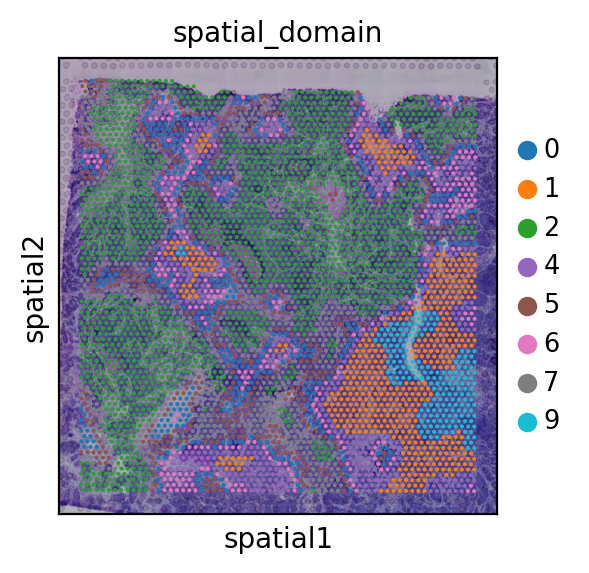

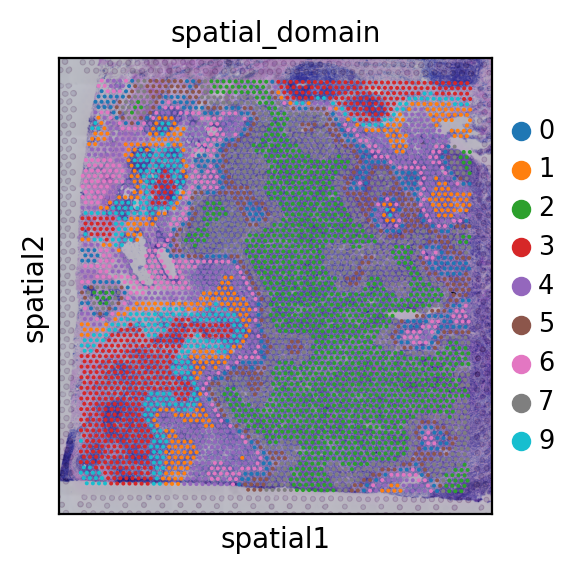

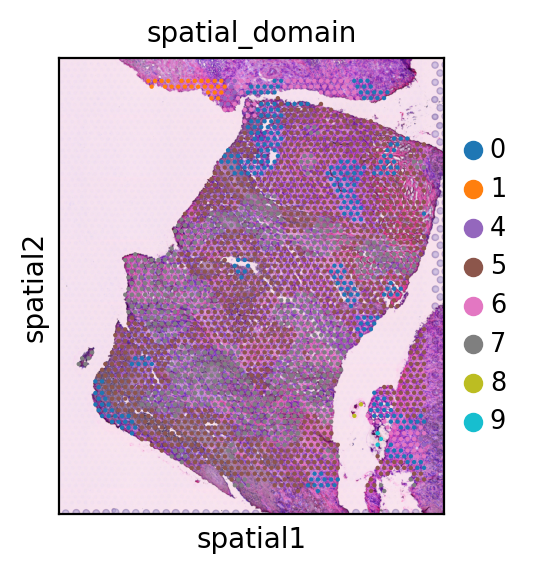

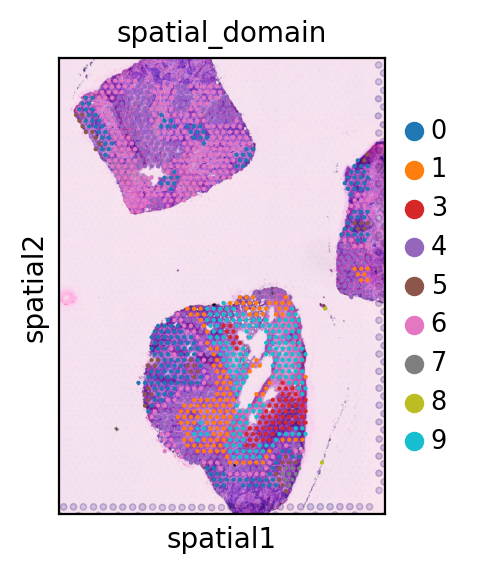

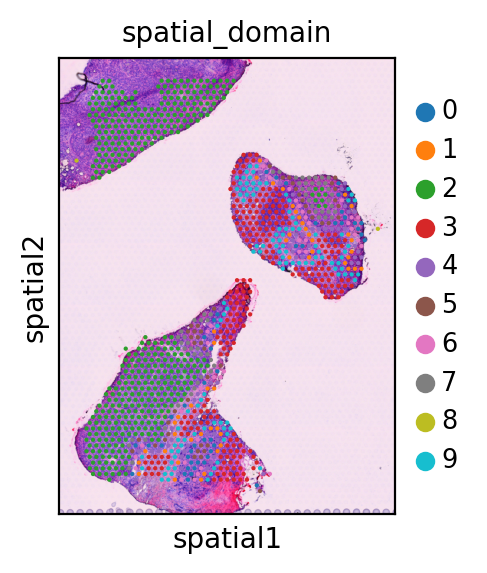

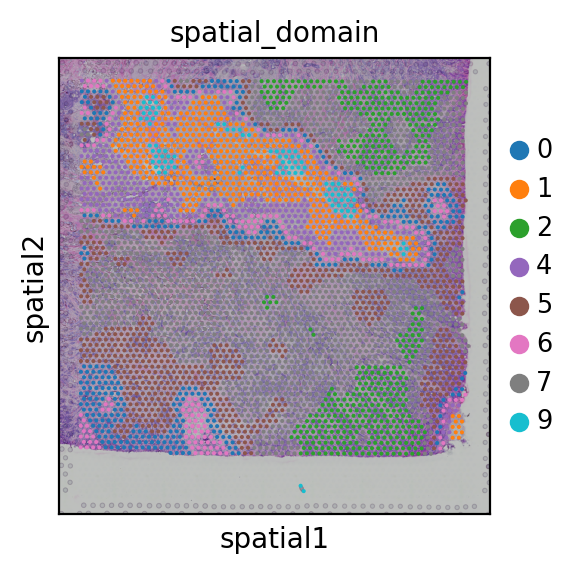

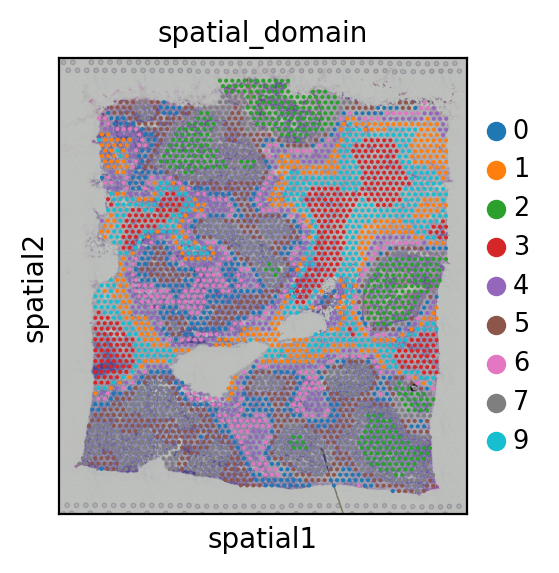

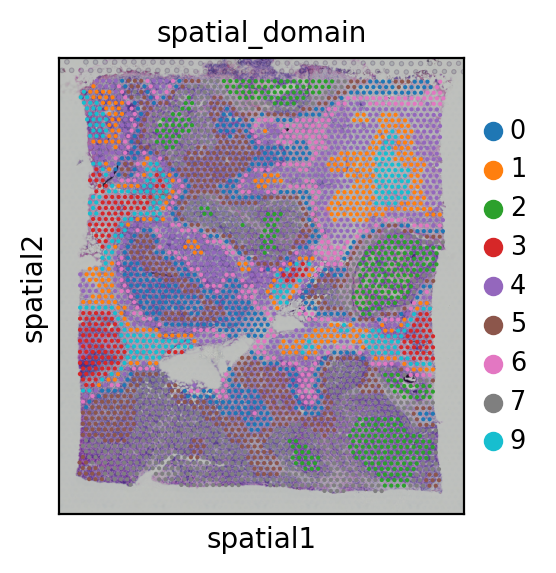

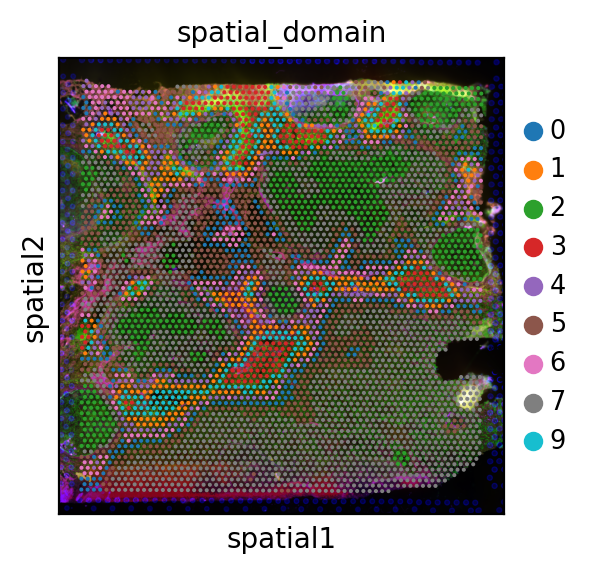

In [11]:
for ad in st_ad_list:
    sc.pl.spatial(ad,color='spatial_domain')